In [13]:
import pandas as pd
import numpy as np

from sklearn.metrics import fbeta_score

pd.options.display.max_colwidth=100
pd.options.display.max_columns=300

employees = pd.read_csv("../data/employees.csv")
history = pd.read_csv("../data/history.csv")
submission = pd.read_csv("../data/submission.csv")

history.loc[:,'Date'] = list(pd.to_datetime(history['Date']))

def get_month(text):
    if type(text) == str:
        numbers = text.split("/")
        return int(numbers[0])

def get_year(text):
    if type(text) == str:
        numbers = text.split("/")
        return int(numbers[-1])

df = history.merge(employees)

# for data labeling
def label_df(data, n_month=3):
    labels = []
    for emp in data.EmployeeID.unique():
        curr_emp = list(data[data.EmployeeID == emp]['DismissalDate'])
        len_emp = len(curr_emp)
        if pd.isnull(curr_emp[0]):
            labels += [0 for _ in range(len_emp - n_month)] + [2 for _ in range(n_month)]
        else:
            labels += [0 for _ in range(len_emp - n_month)] + [1 for _ in range(n_month)]
    return labels

lbls = label_df(df)
df['target'] = lbls

In [14]:
df.head()

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary,HiringDate,DismissalDate,target
0,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-07-01,3,292,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.7619,40,0,0,0,15,1,9,0,39,0.887446,1,1,6/1/13,NaN,0
1,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-08-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,1.0000,0,0,0,0,15,1,9,200,28,0.887446,2,2,6/1/13,NaN,0
2,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-09-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.5000,72,0,0,0,15,1,9,0,43,0.887446,3,3,6/1/13,NaN,0
3,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-10-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.8636,16,0,0,0,15,1,9,0,49,0.887446,4,4,6/1/13,NaN,0
4,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-11-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.8000,8,0,0,0,15,1,9,0,43,0.887446,5,5,6/1/13,NaN,0


In [15]:
df.EmployeeID.unique()

array(['00116D71-E87D-4B64-A566-1F29B2A798A8',
       '001502BB-B61A-404D-8A99-CC5DE5A4F985',
       '001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A', ...,
       'FFEBB9DA-B0CF-49AE-91D3-14A0BF22219E',
       'FFED12A3-5B28-4101-908A-2851CBADE045',
       'FFF3B179-1D20-40FF-A330-A051BDF37301'], dtype=object)

In [27]:
df.head(2)

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary,HiringDate,DismissalDate,target
0,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-07-01,3,292,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.7619,40,0,0,0,15,1,9,0,39,0.887446,1,1,6/1/13,NaN,0
1,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-08-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,1.0000,0,0,0,0,15,1,9,200,28,0.887446,2,2,6/1/13,NaN,0


In [32]:
df.describe()

,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary,target
count,87766.000000,87766.000000,87766.000000,87766.000000,87766.000000,87766.000000,87766.000000,87766.000000,87766.000000,87766.000000,87766.000000,87766.000000,87766.000000,87766.000000,87766.000000,87766.000000,8.776600e+04,87766.000000,87766.00000,87766.000000,87766.000000
mean,4.045496,253.320808,186.932058,3.098273,0.067486,12.017911,0.349646,0.559198,9.941709,3.300093,2.565675,0.008363,16.509685,0.323907,13.812524,101.414545,-6.078487e+03,1.000000,7.19176,4.908655,0.332555
std,5.452865,107.104494,270.731459,2.511645,0.250864,6.664529,0.476861,0.484058,21.404060,20.990415,17.761757,0.091068,11.596225,1.615554,7.268803,901.473909,1.193042e+06,1.106475,5.16939,3.959279,0.720944
min,-1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,-2194.000000,-3.000879e+08,0.028084,1.00000,1.000000,0.000000
25%,1.000000,255.000000,4.000000,2.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,9.000000,0.000000,0.000000e+00,0.366774,3.00000,2.000000,0.000000
50%,1.000000,290.000000,69.000000,2.000000,0.000000,11.000000,0.000000,0.863950,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,9.000000,0.000000,2.100000e+01,0.788872,6.00000,4.000000,0.000000
75%,5.000000,324.000000,206.000000,3.000000,0.000000,18.000000,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,23.000000,1.000000,22.000000,0.000000,4.400000e+01,1.308534,11.00000,7.000000,0.000000
max,36.000000,500.000000,1487.000000,10.000000,1.000000,26.000000,1.000000,7.000000,248.000000,304.000000,207.000000,1.000000,41.000000,9.000000,22.000000,73088.000000,5.110000e+02,18.026927,20.00000,20.000000,2.000000


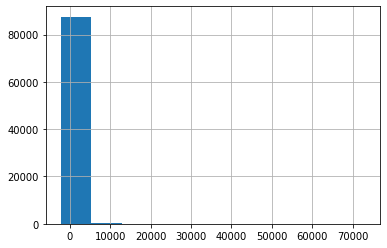

In [54]:
df.BonusOneTime.hist()

# Plan for feature engenering:
- 100>APM>0 
- Years in company
- bonus >0